# 🎯 Objective

To assess how differences in national PM2.5 exposure relate to air-pollution-attributable mortality, informing cross-country environmental health comparisons for 2019.


# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

In [2]:
file_path = '..\data\processed\merged_pm25_deathrate_2019.csv'
df =  pd.read_csv(file_path)
df.head()

,country_code,year,pm25,death_rate
0,COG,2019,29.48397,26.24600
1,VEN,2019,16.21392,30.17941
2,TUR,2019,23.25106,42.32768
3,FSM,2019,7.78563,32.68390
4,KOR,2019,24.03774,37.64416


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  183 non-null    object 
 1   year          183 non-null    int64  
 2   pm25          183 non-null    float64
 3   death_rate    183 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.8+ KB


In [7]:
df.describe()

,year,pm25,death_rate
count,183.0,183.000000,183.000000
mean,2019.0,22.111025,43.875603
std,0.0,13.763688,27.307805
min,2019.0,5.199030,10.035280
25%,2019.0,11.382040,26.029410
50%,2019.0,17.827810,34.739960
75%,2019.0,29.274920,51.436890
max,2019.0,64.077140,155.182880


In [22]:
print(df[df["pm25"] == df["pm25"].max()])
print(df[df["death_rate"] == df["death_rate"].max()])

   country_code  year      pm25  death_rate
47          KWT  2019  64.07714    23.29692
   country_code  year      pm25  death_rate
88          BGR  2019  17.29031   155.18288


In [ ]:
df.nlargest(5, "pm25")[["country_code", "pm25", "death_rate"]]

,country_code,pm25,death_rate
47,KWT,64.07714,23.29692
178,EGY,63.15743,69.13351
112,AFG,62.48616,54.26153
150,QAT,59.03746,15.12658
34,SAU,57.15638,50.34623


In [ ]:
df.nlargest(5, "death_rate")[["country_code", "pm25", "death_rate"]]

,country_code,pm25,death_rate
88,BGR,17.29031,155.18288
39,UKR,13.50727,136.84397
57,BLR,15.48201,133.79792
100,GEO,19.06419,130.60129
48,LTU,10.36907,115.12323


### 🌍 Countries with Extreme Values (2019)

#### 🌫️ Highest PM2.5 Exposure
The countries with the highest PM2.5 concentrations are primarily located in the **Middle East and South Asia**:

- 🇰🇼 Kuwait, 🇪🇬 Egypt, 🇦🇫 Afghanistan, 🇶🇦 Qatar, 🇸🇦 Saudi Arabia  
- These countries exhibit **very high pollution levels**, yet their air-pollution-attributable death rates vary substantially

#### ☣️ Highest Air-Pollution-Attributable Death Rates
Countries with the highest mortality rates attributable to air pollution are mainly in **Eastern Europe and Central Asia**:

- 🇧🇬 Bulgaria, 🇺🇦 Ukraine, 🇧🇾 Belarus, 🇬🇪 Georgia, 🇱🇹 Lithuania  
- Despite **moderate PM2.5 levels**, these countries experience **very high mortality**, indicating increased vulnerability

🧠 Together, these contrasts highlight that air-pollution-related mortality is influenced by factors beyond pollution exposure alone, such as population age structure, baseline health conditions, and healthcare system effectiveness.


## Pm25 Distribution

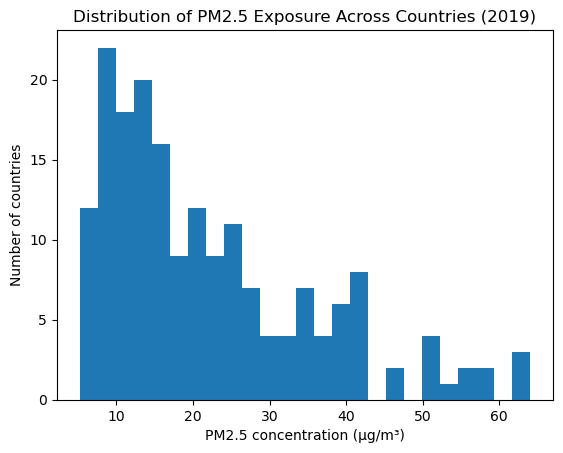

In [ ]:
plt.hist(df["pm25"], bins=25)
plt.xlabel("PM2.5 concentration (µg/m³)")
plt.ylabel("Number of countries")
plt.title("Distribution of PM2.5 Exposure Across Countries (2019)")
plt.show()

### 🌫️ Distribution of PM2.5 Exposure (2019)

- 📊 Most countries fall within **low to moderate PM2.5 levels** (approximately 5–25 µg/m³)
- ➡️ The distribution is **right-skewed**, indicating a small number of countries with **very high pollution**
- 🚨 A few **outliers** experience extreme PM2.5 concentrations above 40 µg/m³

🔍 Overall, the distribution highlights substantial **inequality in air pollution exposure** across countries in 2019.


## Death Rate vs PM2.5

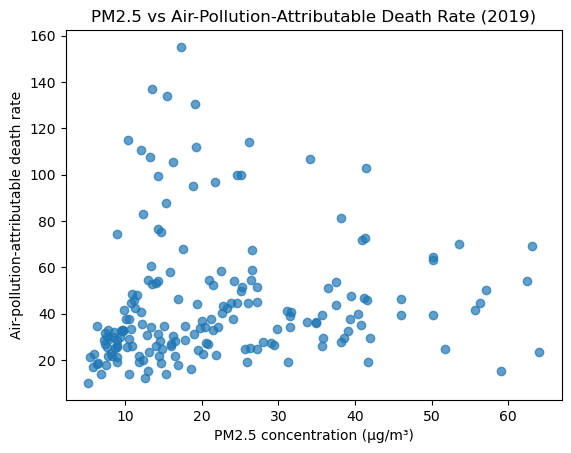

In [ ]:
plt.scatter(df["pm25"], df["death_rate"], alpha=0.7)
plt.xlabel("PM2.5 concentration (µg/m³)")
plt.ylabel("Air-pollution-attributable death rate")
plt.title("PM2.5 vs Air-Pollution-Attributable Death Rate (2019)")
plt.show()

### ☣️ PM2.5 Exposure vs Air-Pollution-Attributable Death Rate (2019)

- 📈 A **positive association** is visible: countries with higher PM2.5 exposure tend to have higher air-pollution-attributable death rates
- 🌍 Considerable **variation** exists, especially at higher pollution levels, indicating that other factors (e.g. healthcare systems, demographics) also play a role
- 🚨 Several **outliers** show high mortality even at moderate PM2.5 levels, highlighting unequal vulnerability across countries

🔎 Overall, the scatter plot suggests that higher air pollution is generally associated with worse health outcomes, though the relationship is not perfectly linear.


## Correlation

In [11]:
corr = df["pm25"].corr(df["death_rate"])
round(corr,2)


0.12

### 📐 Correlation Between PM2.5 and Death Rate

- 🔢 The Pearson correlation coefficient between **PM2.5 exposure** and **air-pollution-attributable death rate** is **0.12**, indicating a **weak positive association**
- 📉 While higher PM2.5 levels are generally associated with higher mortality, PM2.5 alone explains only a small portion of the variation across countries
- 🧩 This suggests that additional factors—such as healthcare access, population demographics, and long-term exposure—play a significant role in determining health outcomes

⚠️ Correlation describes association, not causation.


<hr>

### 📌 Exploratory Data Analysis Summary

- 🌫️ PM2.5 exposure levels vary widely across countries in 2019, with most experiencing low to moderate pollution and a smaller group facing very high concentrations
- ☣️ Countries with higher PM2.5 levels tend to have higher air-pollution-attributable death rates, though the relationship is **weakly positive**
- 🌍 Substantial variation in mortality exists even at similar pollution levels, indicating the influence of additional factors such as healthcare capacity and population vulnerability
- ⚠️ The analysis is cross-sectional and limited to a single year, so results describe associations rather than causal or temporal relationships
